# Collaboration and Competition

In this notebook, we're training Tennis environment using the Unity ML-Agents as a part for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Install required dependencies

In [1]:
!pip install --upgrade pip
!pip --quiet install unityagents
!pip --quiet install torch
!pip --quiet install numpy
!pip --quiet install matplotlib

Requirement already up-to-date: pip in /anaconda/lib/python3.6/site-packages (18.1)


### 2. Start the Environment

Let's import the necessary packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import torch.nn as nn
import time
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Download the Tennis environment (binary file) for your operating system and configure file_name variable to point to the binary file.

* Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis_Linux.zip)
* Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis.app.zip)
* Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis_Windows_x86.zip)
* Windows (64-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis_Windows_x86_64.zip)

We're going to use the file for Mac OSX.

### 3. Start the environment

In [3]:
env = UnityEnvironment(file_name='Tennis.app')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))
num_agents = len(env_info.agents)

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Number of actions: 2
States look like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
States have length: 24


### 4. Define DDPG procedure that will be invoked to train the agent

In [4]:
def ddpg(n_episodes=3000):
    scores_deque = deque(maxlen=100)
    scores = []
    average_score=[]
    max_score = 0
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        
        while True:
            actions = agent.act(states)                        
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations         
            rewards = env_info.rewards                         
            dones = env_info.local_done                        
            agent.step(states, actions, rewards, next_states, dones)
            score += rewards                                   
            states = next_states                               
            if np.any(dones):                                  
                break

        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        average_score.append(np.mean(scores_deque))
        
        print('\rEpisode {}\tAverage Score: {:.3f}\tScore: {:.3f}'.format(i_episode, np.mean(scores_deque), np.mean(score)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))
            max_score = np.mean(scores_deque)
            
        # save agent if 100 perfomance is better, that max_score
        if max_score < np.mean(scores_deque):
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            max_score = np.mean(scores_deque)
            
    return scores, average_score

In [5]:
scores, scores_window = ddpg()

Episode 100	Average Score: 0.003	Score: 0.0455
Episode 200	Average Score: 0.012	Score: -0.005
Episode 300	Average Score: 0.014	Score: -0.005
Episode 400	Average Score: 0.004	Score: -0.005
Episode 500	Average Score: -0.005	Score: -0.005
Episode 600	Average Score: 0.004	Score: -0.0055
Episode 700	Average Score: 0.006	Score: -0.005
Episode 800	Average Score: 0.011	Score: 0.0455
Episode 900	Average Score: 0.011	Score: -0.005
Episode 1000	Average Score: 0.020	Score: 0.095
Episode 1100	Average Score: 0.033	Score: 0.0455
Episode 1200	Average Score: 0.042	Score: 0.0455
Episode 1300	Average Score: 0.041	Score: -0.005
Episode 1400	Average Score: 0.042	Score: 0.0455
Episode 1500	Average Score: 0.054	Score: 0.0455
Episode 1600	Average Score: 0.065	Score: -0.005
Episode 1700	Average Score: 0.067	Score: 0.3455
Episode 1800	Average Score: 0.078	Score: 0.3955
Episode 1900	Average Score: 0.092	Score: 0.2455
Episode 2000	Average Score: 0.203	Score: 0.1455
Episode 2100	Average Score: 0.295	Score: -0.005


### 6. Close the environment

In [6]:
env.close()

### 7. Plot the rewards per episode

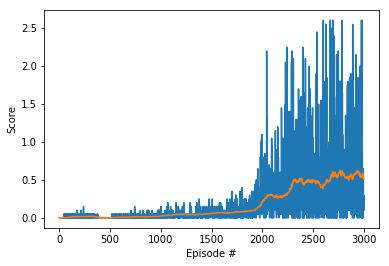

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(scores_window)+1), scores_window)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('rewards_per_episode.png')
plt.show()

### 8. Test the trained agent

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations              # get the current state (for each agent)
state_size = len(env_info.vector_observations[0])  # state size
action_size = brain.vector_action_space_size       # number of actions
num_agents = len(env_info.agents)                  # number of agents
scores = np.zeros(num_agents)                      # initialize the score
dones = False

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

# transferlerning from saved state and set to evaluate
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.actor_local.eval()

agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
agent.critic_local.eval()

while not np.any(dones):
   actions = agent.act(states)                        # select an action (for each agent)
   actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1 
   env_info = env.step(actions)[brain_name]           # send all actions to tne environment
   next_states = env_info.vector_observations         # get next state (for each agent)
   rewards = env_info.rewards                         # get reward (for each agent)
   dones = env_info.local_done                        # see if episode finished
   scores += env_info.rewards                         # update the score (for each agent)
   states = next_states                               # roll over states to next time step

print("Score: {}".format(scores))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Score: [0.3  0.29]


### 9. Close the environment

In [3]:
env.close()